In [51]:
%matplotlib inline
from io import StringIO
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
# https://docs.google.com/spreadsheets/d/1c5yGydEANMzHjBufTzph0w-WGwJyiwPMRYz3yBZatb4/edit#gid=0
# tf_cnn_benchmarks, our measurements, inception3/resnet50
table = StringIO("""machine	GPUs	model	images/sec	speedup	efficiency
az-2x-m60	1	inception3	47.49	1.00	100.00
az-2x-m60	2	inception3	95.43	2.01	100.47
7gforce	1	inception3	78.44	1.00	100.00
7gforce	2	inception3	118.32	1.51	75.42
7gforce	4	inception3	236.86	3.02	75.49
7gforce	6	inception3	351.98	4.49	74.79
az-2x-m60	1	resnet50	77.94	1.00	100.00
az-2x-m60	2	resnet50	151.65	1.95	97.29
7gforce	1	resnet50	119.8	1.00	100.00
7gforce	2	resnet50	196	1.64	81.80
7gforce	4	resnet50	364.32	3.04	76.03
7gforce	6	resnet50	571.9	4.77	79.56
""")
df = pd.read_csv(table, sep='\t')

In [22]:
df

,machine,GPUs,model,images/sec,speedup,efficiency
0,az-2x-m60,1,inception3,47.49,1.00,100.00
1,az-2x-m60,2,inception3,95.43,2.01,100.47
2,7gforce,1,inception3,78.44,1.00,100.00
3,7gforce,2,inception3,118.32,1.51,75.42
4,7gforce,4,inception3,236.86,3.02,75.49
5,7gforce,6,inception3,351.98,4.49,74.79
6,az-2x-m60,1,resnet50,77.94,1.00,100.00
7,az-2x-m60,2,resnet50,151.65,1.95,97.29
8,7gforce,1,resnet50,119.80,1.00,100.00
9,7gforce,2,resnet50,196.00,1.64,81.80


In [26]:
df_inception3 = df[df['model'] == 'inception3']
df_resnet50 = df[df['model'] == 'resnet50']

In [42]:
def select(model, machine):
    return df[(df['model']==model) & (df['machine']==machine)]

In [80]:
def plot_table(model, metric):
    fig = plt.figure(figsize=(15,5))
    title = 'tf_cnn_benchmark - %s/imagenet-synth - %s' % (model, metric)
    plt.suptitle(title)
    plt.xlabel('number of GPUs')
    plt.ylabel(metric)
    gpu_count = df['GPUs'].max()
    x_ideal = 1+np.arange(gpu_count)
    if metric == 'speedup':
        y_ideal = 1+np.arange(gpu_count)
    elif metric == 'efficiency':
        y_ideal = 100 * np.ones(gpu_count) # %
    plt.bar(x_ideal, y_ideal, alpha=0.25, label='ideal')
    d = select(model, 'az-2x-m60')
    plt.plot(d['GPUs'], d[metric], 'o-', label='az-2x-m60')
    d = select(model, '7gforce')
    plt.plot(d['GPUs'], d[metric], 'o-', label='7gforce')
    plt.legend();
    plt.savefig('tf_cnn_benchmark_%s_%s.png' % (model, metric))

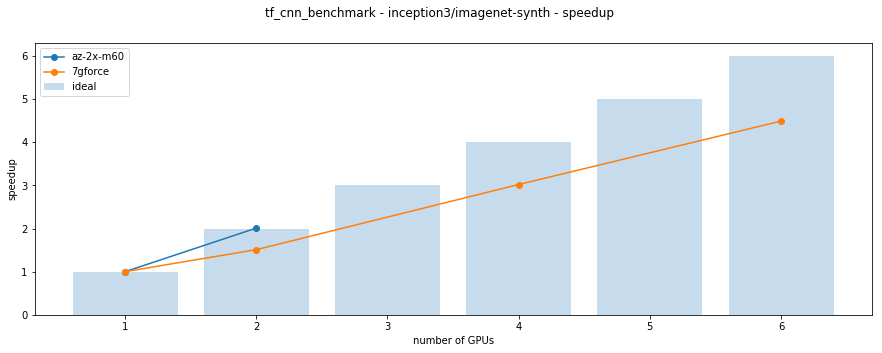

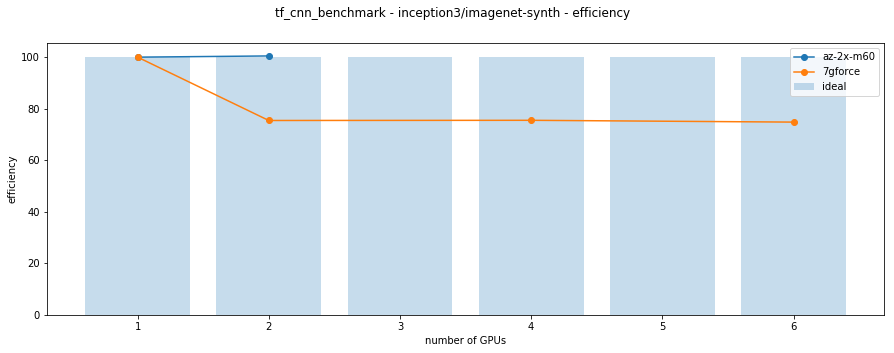

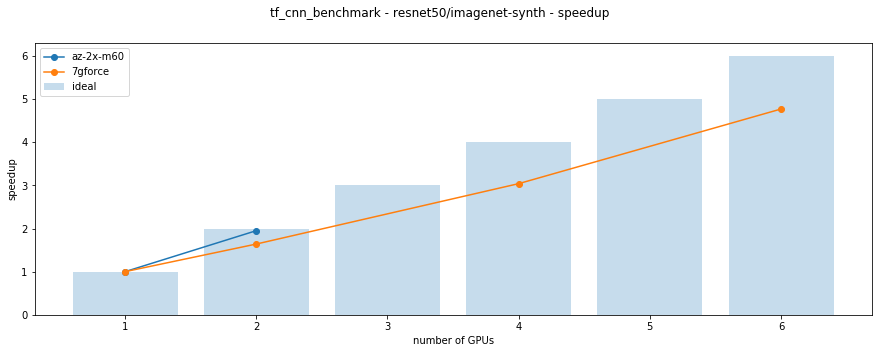

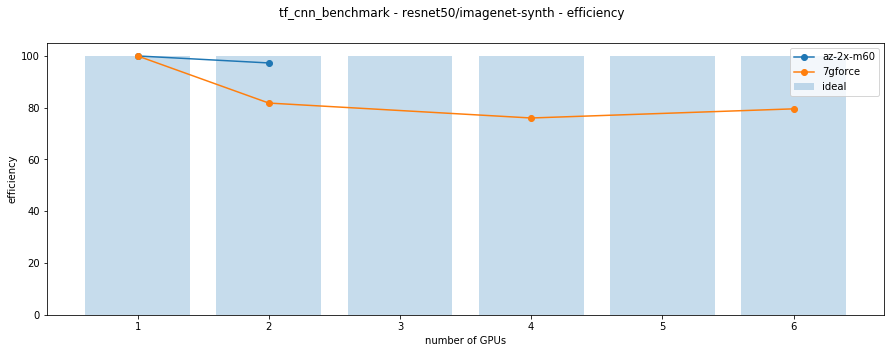

In [81]:
for model in ['inception3', 'resnet50']:
    for metric in ['speedup', 'efficiency']:
        plot_table(model, metric)